In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

In [5]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ----- ------------------------------- 41.0/293.3 kB 281.8 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/293.3 kB 365.7 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/293.3 kB 365.7 kB/s eta 0:00:01
     ------- ---------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires htmlmin==0.1.12, which is not installed.
ydata-profiling 4.1.2 requires statsmodels<0.14,>=0.13.2, which is not installed.
ydata-profiling 4.1.2 requires tqdm<4.65,>=4.48.2, which is not installed.
ydata-profiling 4.1.2 requires typeguard<2.14,>=2.13.2, which is not installed.
ydata-profiling 4.1.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
ydata-profiling 4.1.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.0.3 which is incompatible.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.29.0 which is incompatible.
ydata-profiling 4.1.2 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.


In [8]:
!pip install mlxtend

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)


In [12]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<AxesSubplot: >

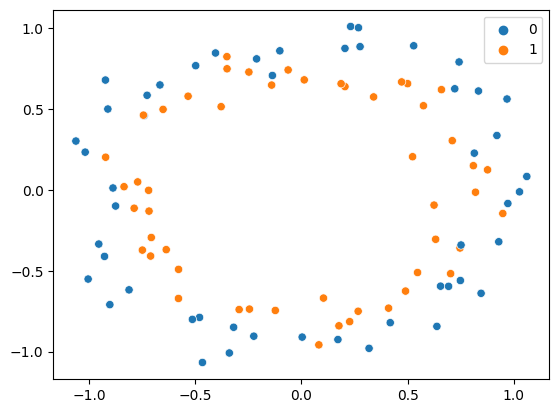

In [14]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [16]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

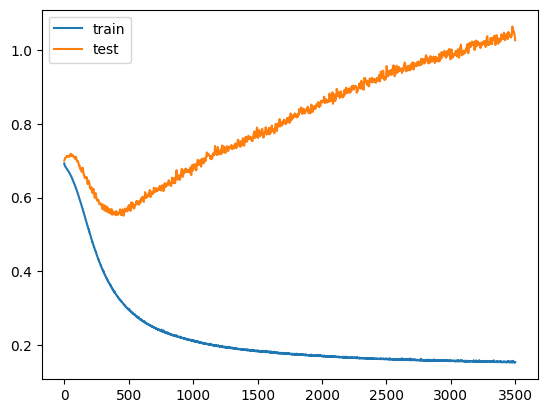

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 21s 2ms/step


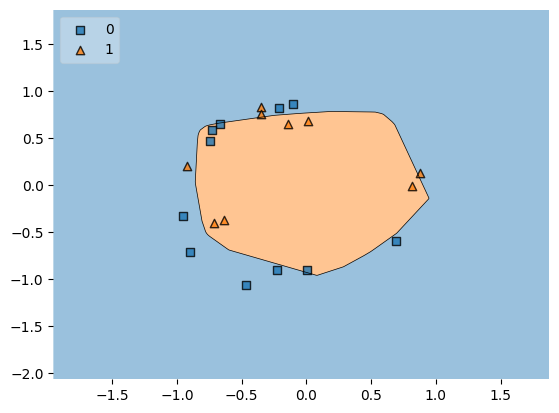

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [21]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 2s 258ms/step - loss: 0.6899 - accuracy: 0.4875 - val_loss: 0.6880 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 42ms/step - loss: 0.6870 - accuracy: 0.4875 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 67ms/step - loss: 0.6859 - accuracy: 0.4875 - val_loss: 0.6954 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 39ms/step - loss: 0.6849 - accuracy: 0.4875 - val_loss: 0.6990 - val_accuracy: 0.5500
Epoch 5/3500
3/3 [==============================] - 0s 39ms/step - loss: 0.6838 - accuracy: 0.4875 - val_loss: 0.7018 - val_accuracy: 0.6000
Epoch 6/3500
3/3 [==============================] - 0s 43ms/step - loss: 0.6829 - accuracy: 0.5125 - val_loss: 0.7035 - val_accuracy: 0.5500
Epoch 7/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6818 - accuracy: 0.5875 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 8/3500

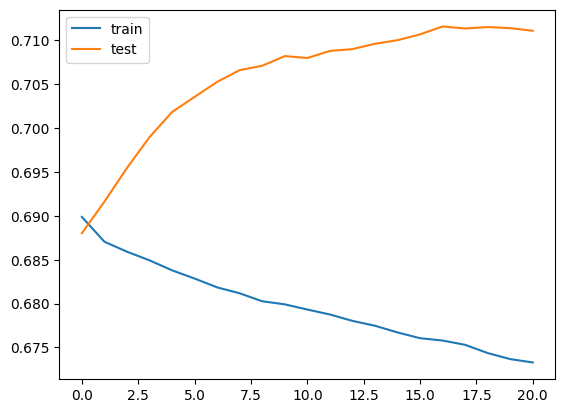

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 33s 3ms/step


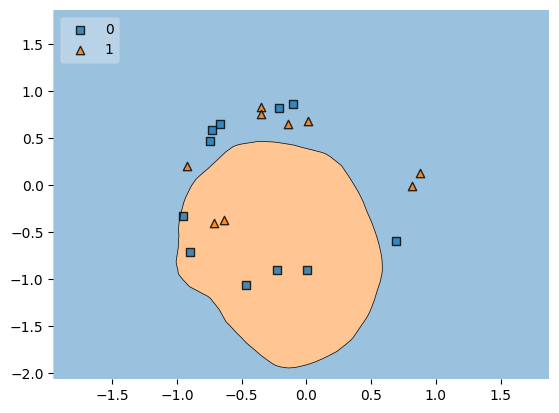

In [26]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()